## Change detection by calculating HH and HV change analysis

# Training Material: Analyzing HH/HV Change

In this section, By analyzing the HH/HV scattering intensities during the two periods focusing on identifying change using divergence from clustered pixel values.

## Module 1: Introduction to HH/HV change analysis

* **Objective:** Learn to analyze and visualize how pixel values within a region of interest change over time (HH/HV change).
* **Target Audience:** Individuals familiar with basic Python and remote sensing concepts.
* **Software Requirements:** Python environment with required libraries.
* **Data:**  ALOS-2/Palsa-2 imagery

Change detection by calculating HH and HV change analysis of ALOS-2 refers to identifying and analyzing changes in surface characteristics (e.g., vegetation, water bodies, urban structures) over time by comparing the backscatter intensities of the HH and HV polarizations from ALOS-2/Palsa-2 imagery.


**HH and HV Polarizations**
- HH polarization: Measures horizontally transmitted and horizontally received signals. It is sensitive to surface roughness and structural features, such as buildings or roads.
- HV polarization: Measures horizontally transmitted and vertically received signals. It is sensitive to volume scattering, often caused by vegetation.

**II. Setup and Installation**

Install necessary Python packages: `temporal_cluster_matching`, `geopandas`, `pandas`, `matplotlib`, `seaborn`, `hydrafloods` (replace with actual installation instructions if needed). Download example data and shapefiles. Set up file paths and ensure data accessibility.

In [ ]:
!pip install temporal-cluster-matching geopandas pandas matplotlib seaborn hydrafloods

### HH/HV change analysis

Calculate the difference in image data to analyze the change from 2007 to 2010 for each HH/HV.

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def calibrate_ima(image):
    return 10 * np.log10(image ** 2) - 83.0

def ima_cal(file_path):
    with rasterio.open(file_path) as src:
        original = src.read(1).astype('float32')
        calibrated = calibrate_ima(original)
    return original, calibrated

hh_2007_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HH.tif'
hh_2010_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2010_HH.tif'
hv_2007_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HV.tif'
hv_2010_path = '/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2010_HV.tif'

hh_2007_raw, hh_2007_cal = ima_cal(hh_2007_path)
hh_2010_raw, hh_2010_cal = ima_cal(hh_2010_path)
hv_2007_raw, hv_2007_cal = ima_cal(hv_2007_path)
hv_2010_raw, hv_2010_cal = ima_cal(hv_2010_path)


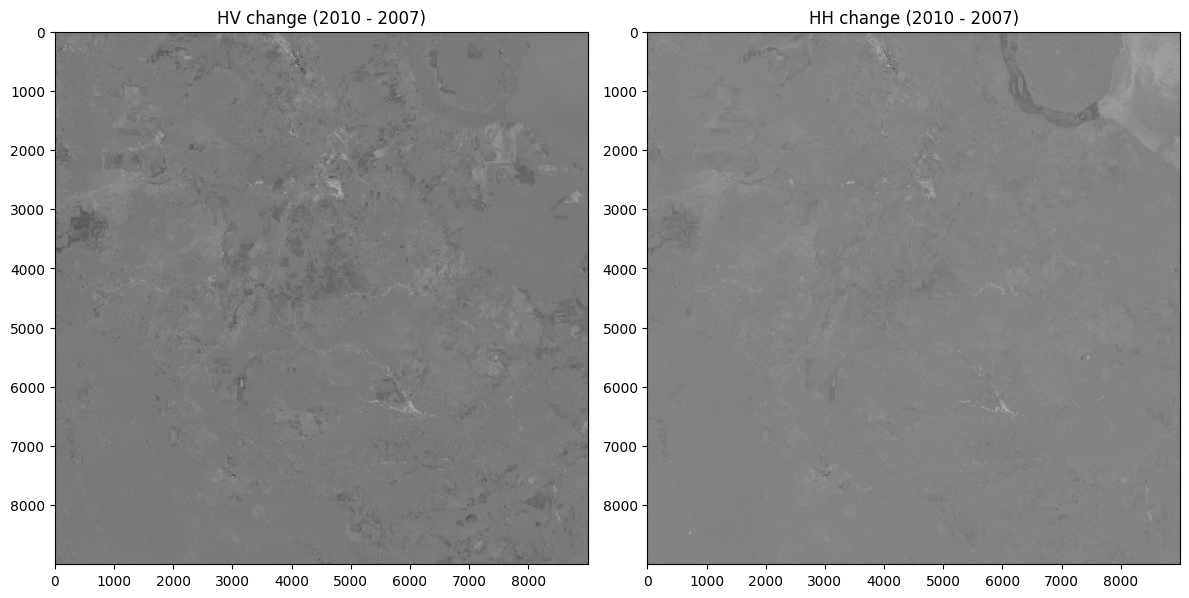

In [2]:
delta_bandhv_cal = hv_2010_cal - hv_2007_cal
delta_bandhh_cal = hh_2010_cal - hh_2007_cal

fig, axs = plt.subplots(1, 2, figsize=(12, 16))

axs[0].imshow(delta_bandhv_cal, cmap='gray')
axs[0].set_title('HV change (2010 - 2007)')
axs[1].imshow(delta_bandhh_cal, cmap='gray')
axs[1].set_title('HH change (2010 - 2007)')
plt.tight_layout()
plt.show()